# Laboratorio 5
### Integrantes:
- Paola Contreras, 20213
- Paola de León, 20361

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler

El archivo UK_foods.csv contiene datos del consumo, en gramos, por persona
por semana de diferentes comidas en cuatro países del Reino Unido.

## Exploración de data

In [3]:
data = pd.read_csv("./UK_foods.csv")
data.head()

,Product,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    17 non-null     object
 1   England    17 non-null     int64 
 2   Wales      17 non-null     int64 
 3   Scotland   17 non-null     int64 
 4   N.Ireland  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 812.0+ bytes


In [5]:
data.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


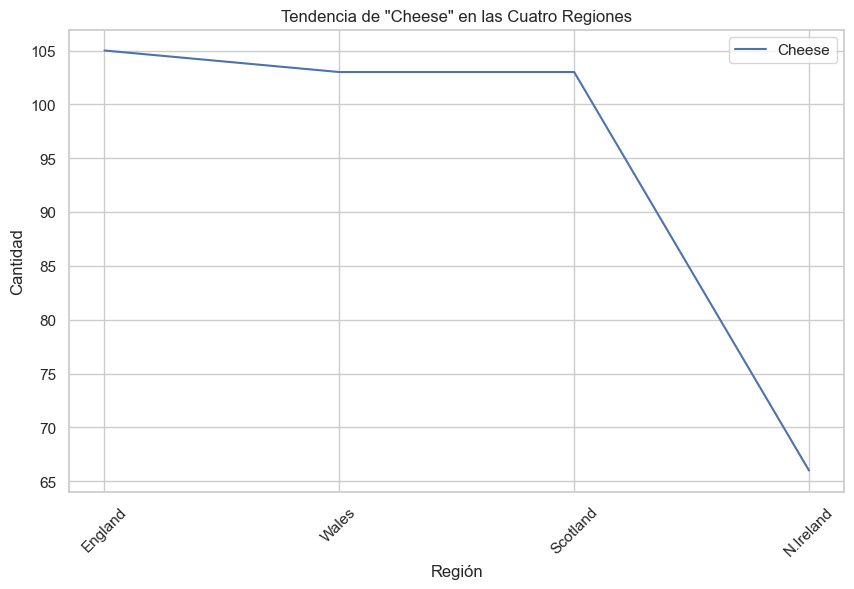

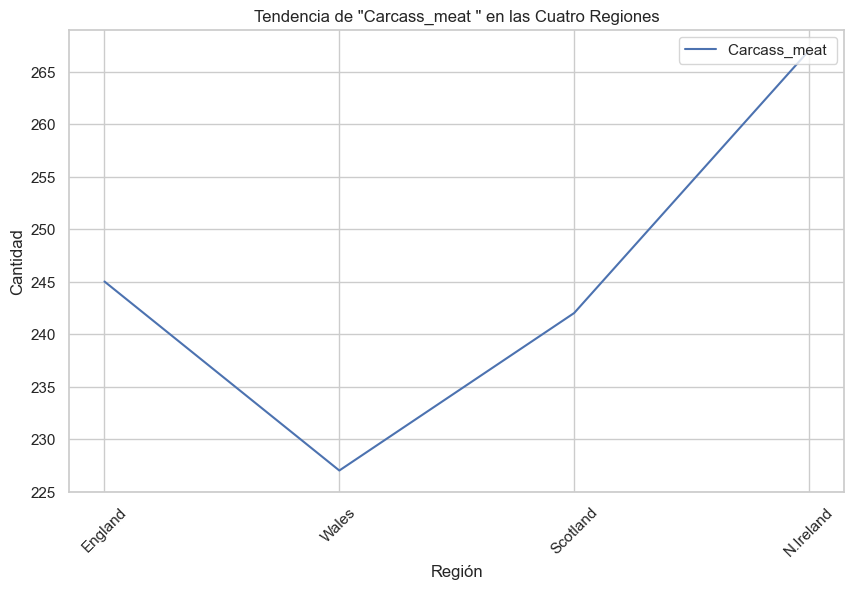

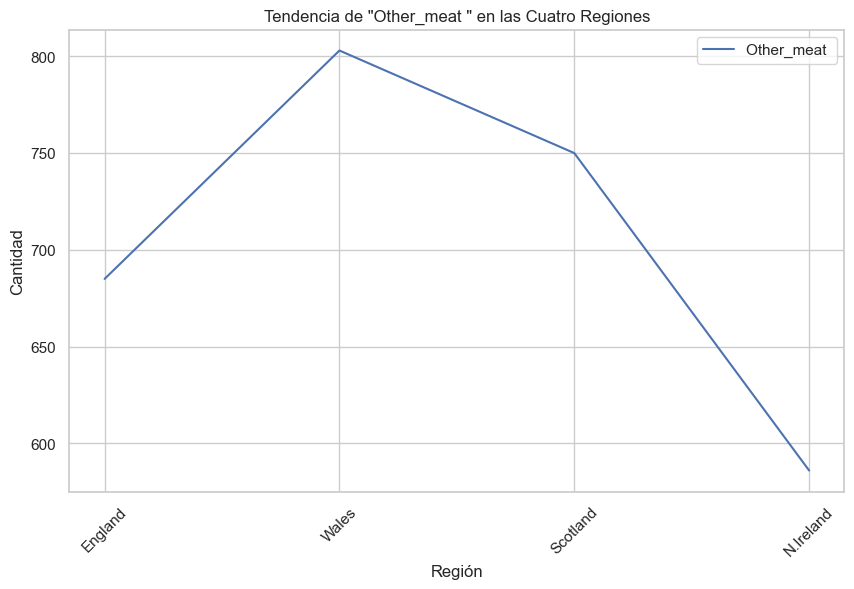

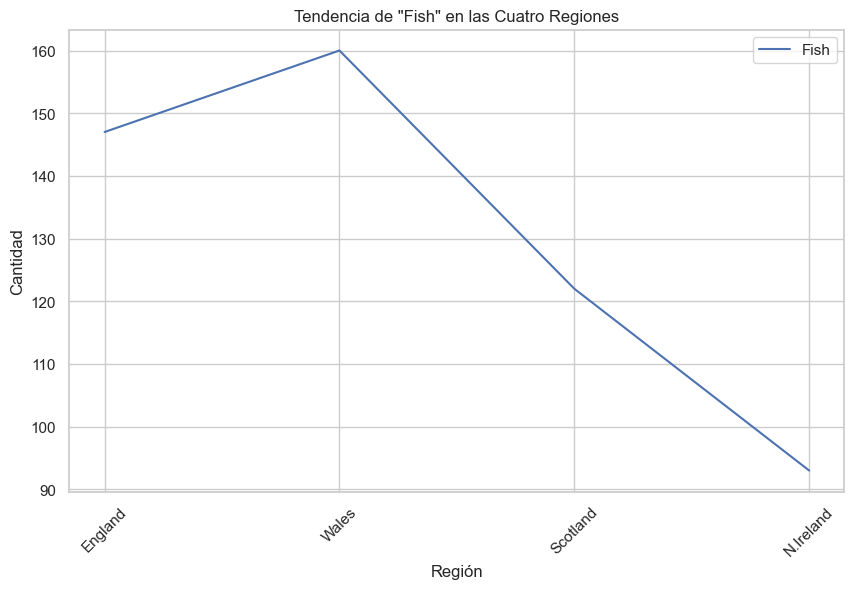

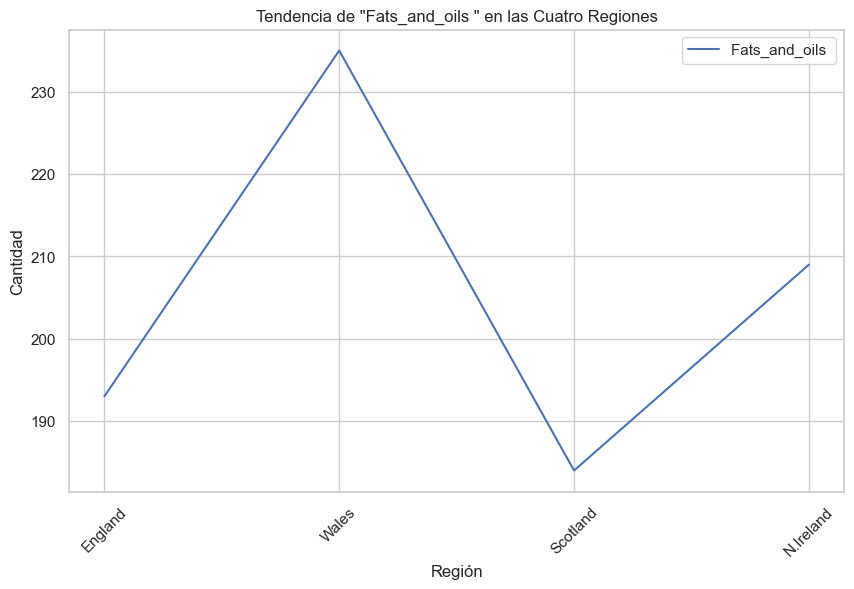

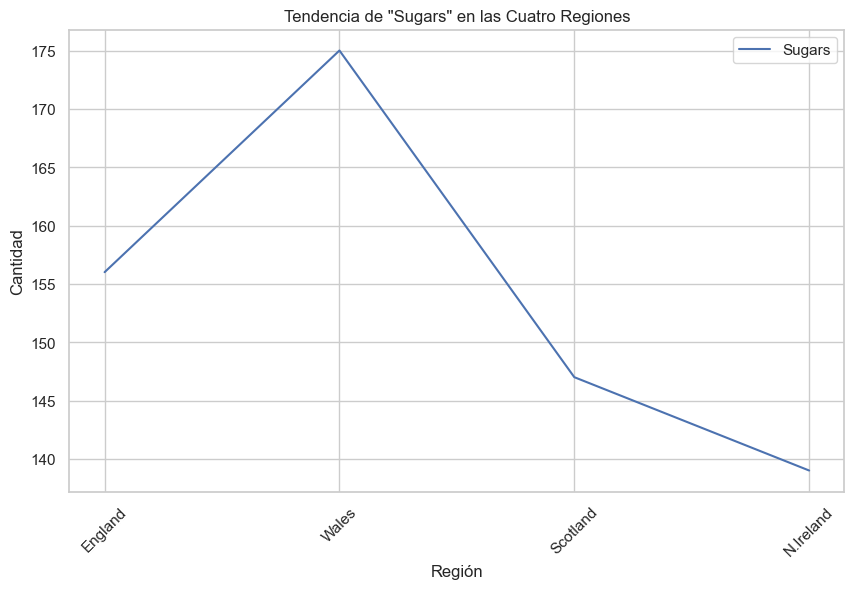

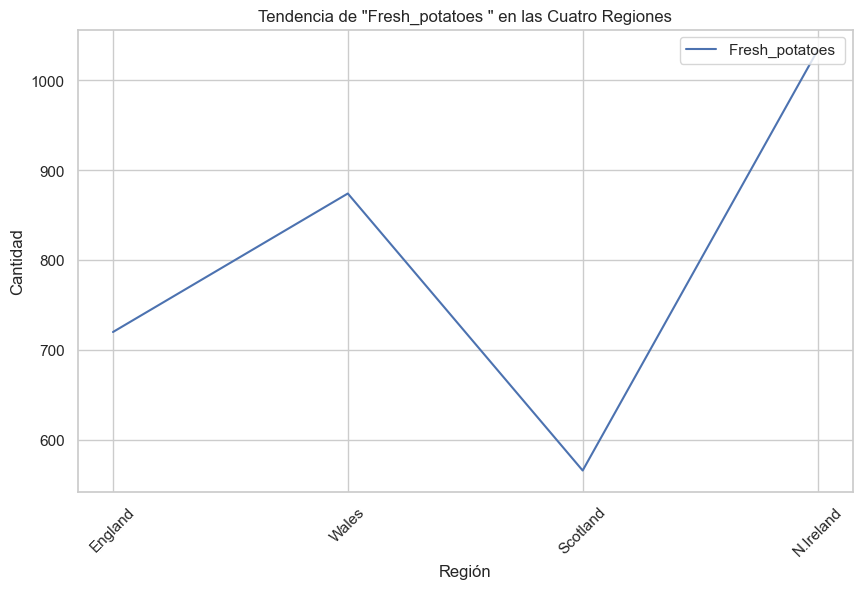

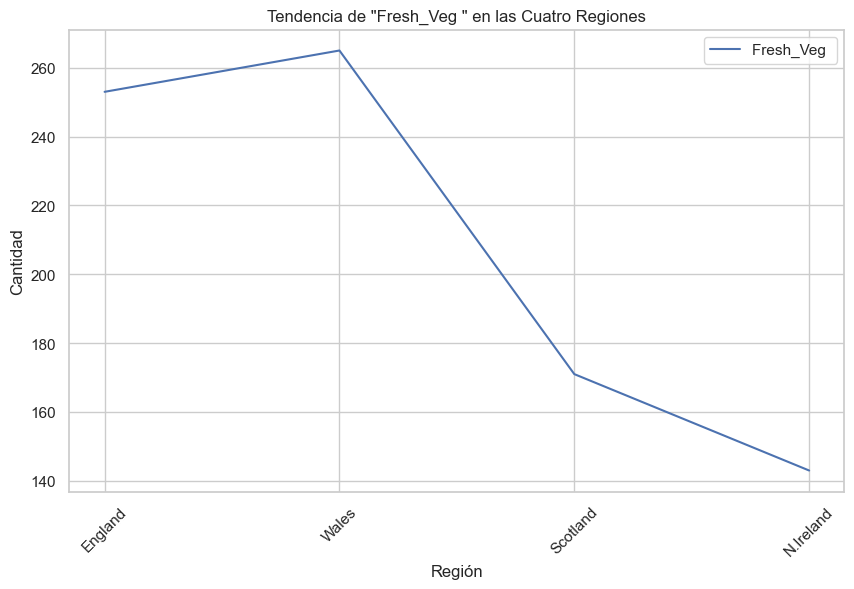

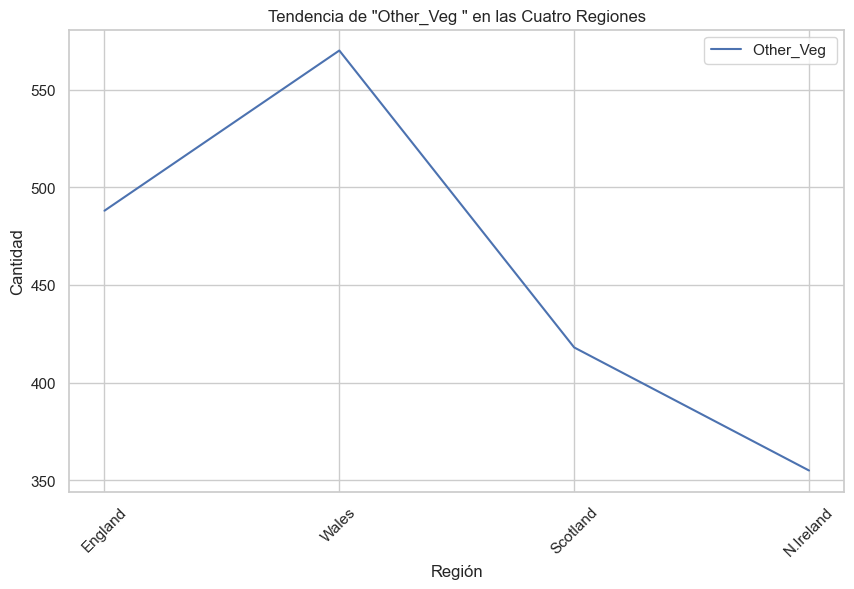

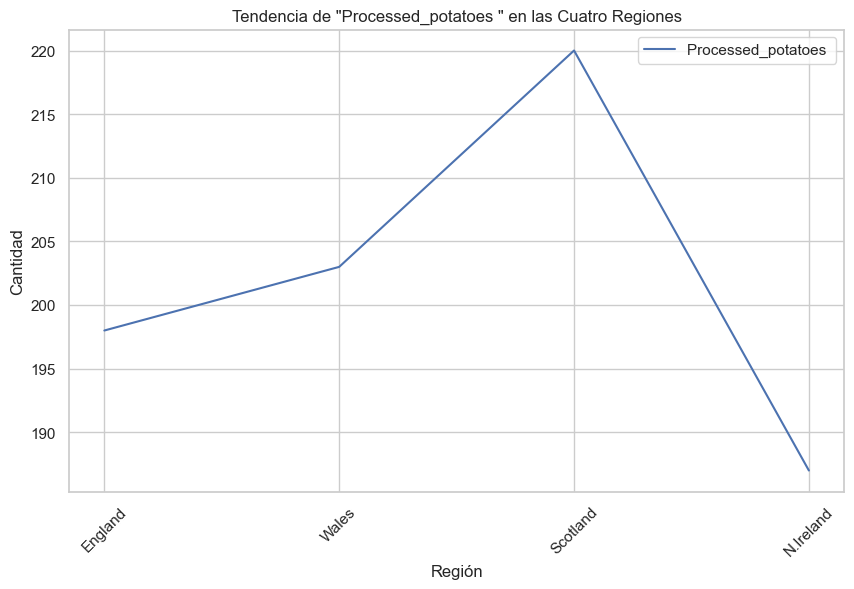

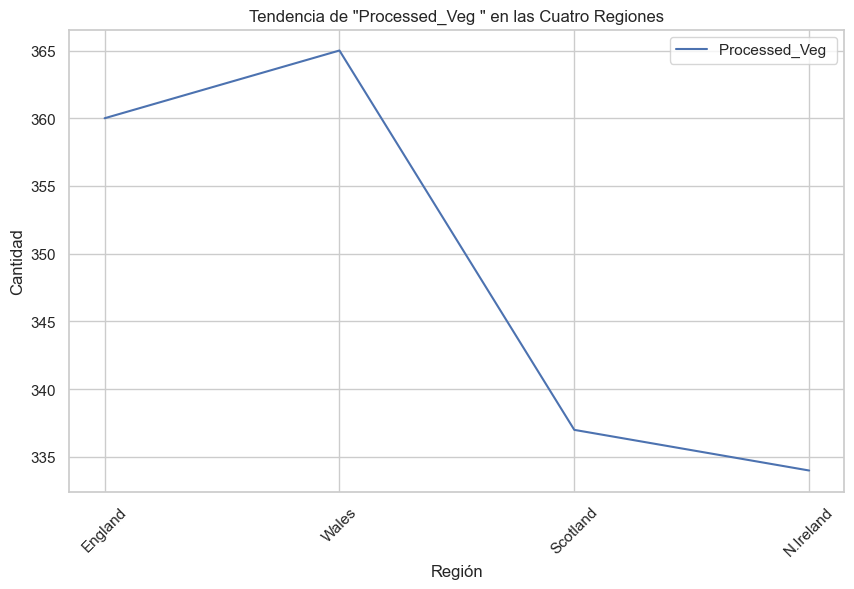

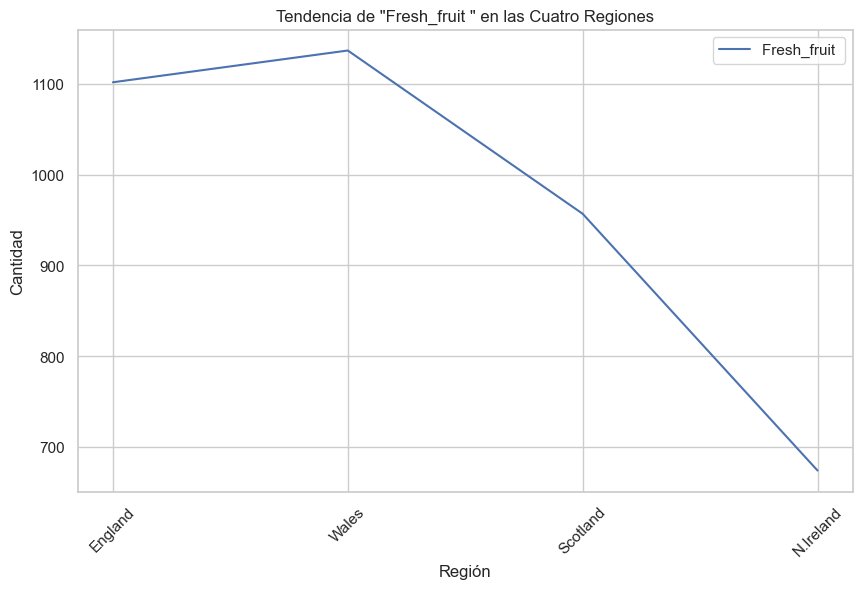

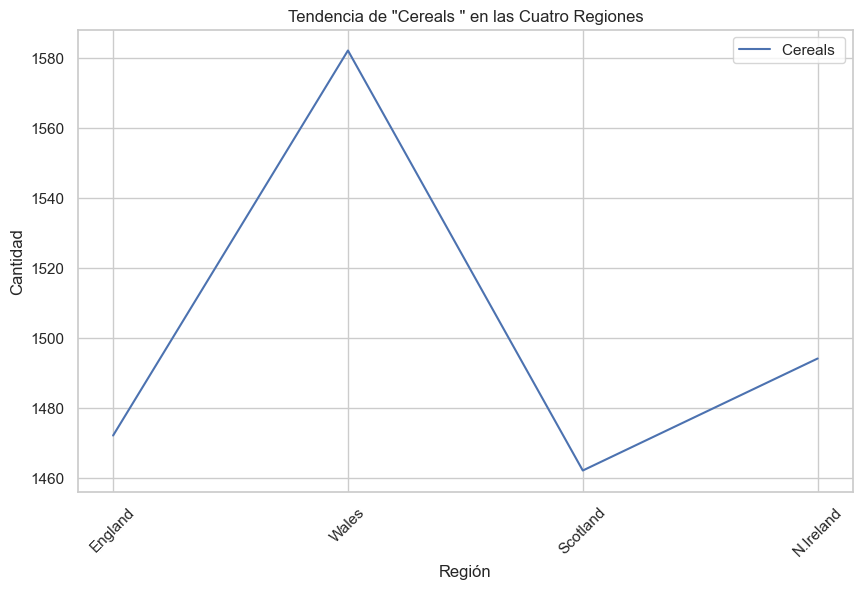

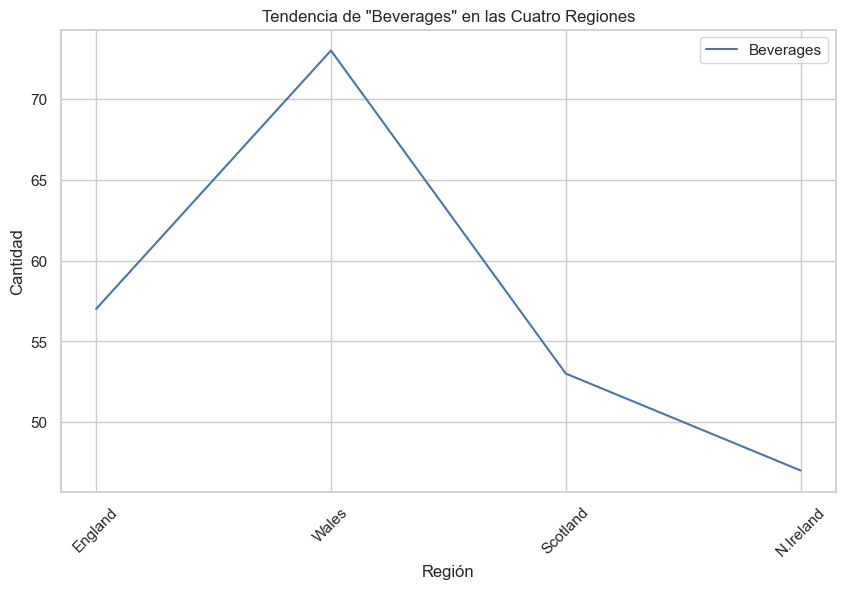

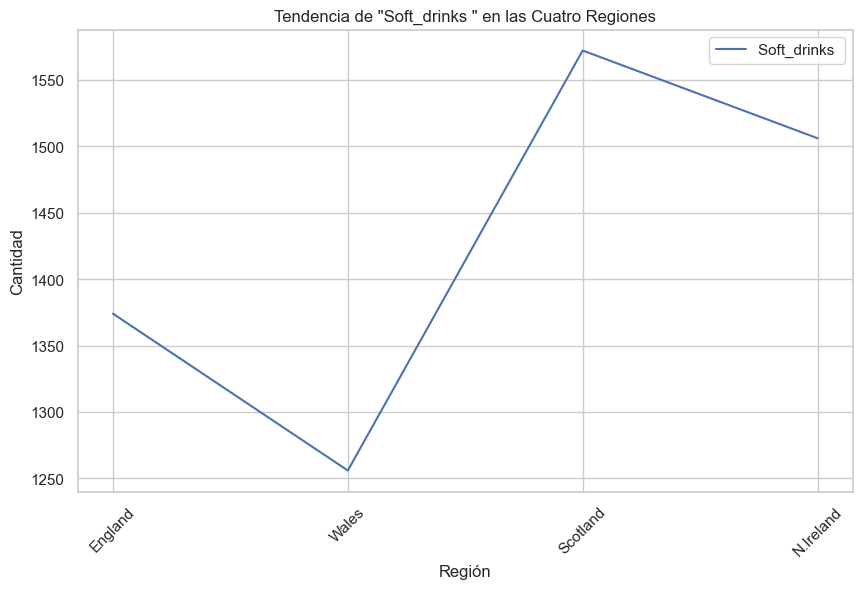

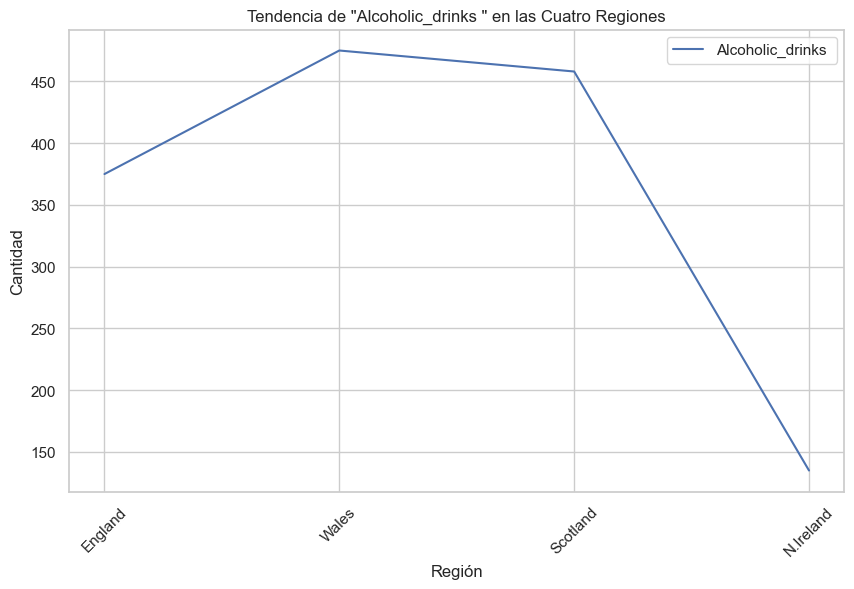

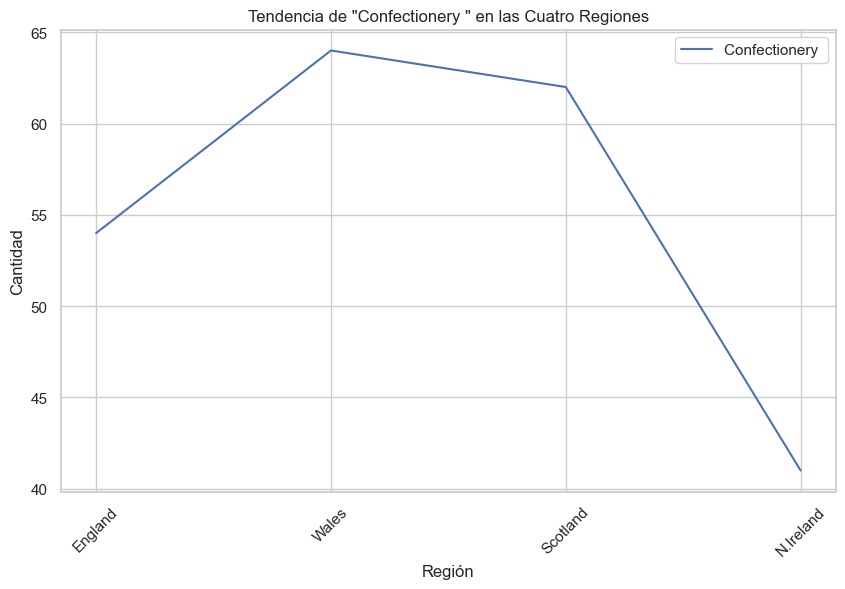

In [6]:
# Obtener la lista de productos únicos
productos = data['Product'].unique()

# Iterar a través de cada producto y crear un gráfico de líneas para cada uno
for product in productos:
    product_data = data[["Product", "England", "Wales", "Scotland", "N.Ireland"]]
    product_data = product_data.melt(id_vars=["Product"], var_name="Region", value_name="Cantidad")

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    sns.lineplot(x="Region", y="Cantidad", data=product_data[product_data["Product"] == product], label=product)

    plt.title(f'Tendencia de "{product}" en las Cuatro Regiones')
    plt.xlabel('Región')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

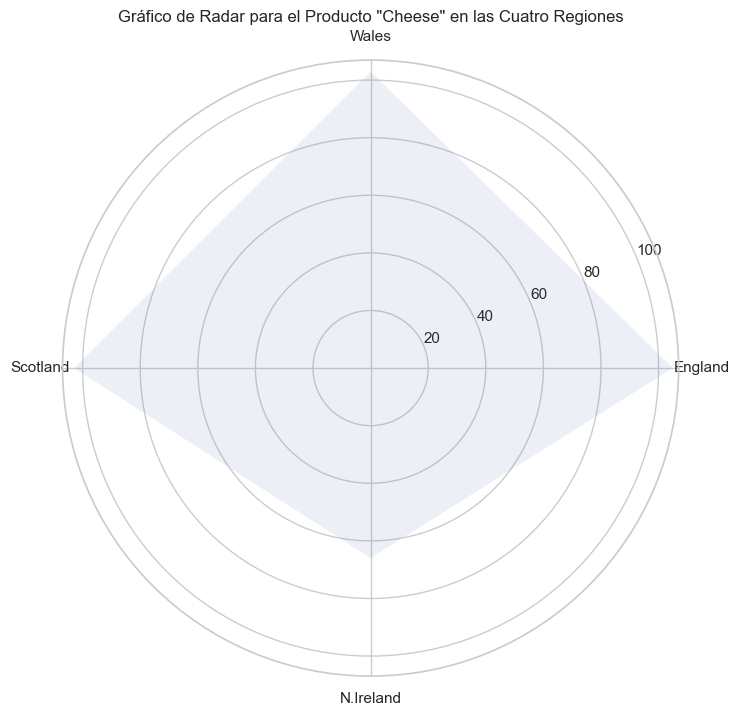

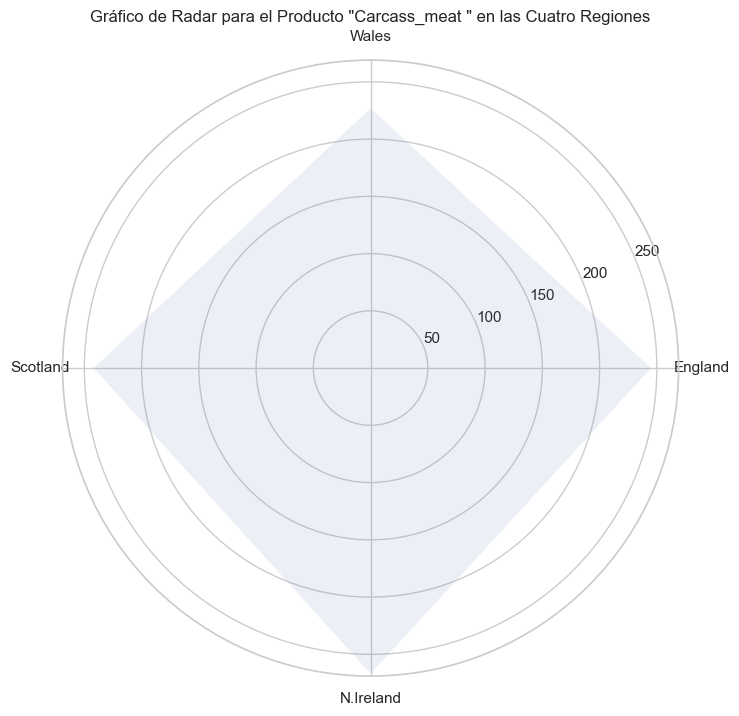

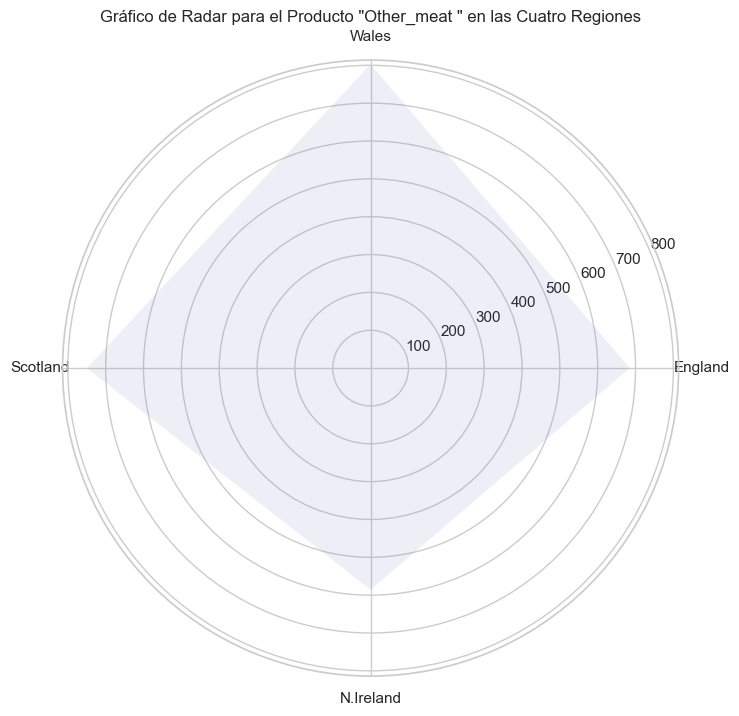

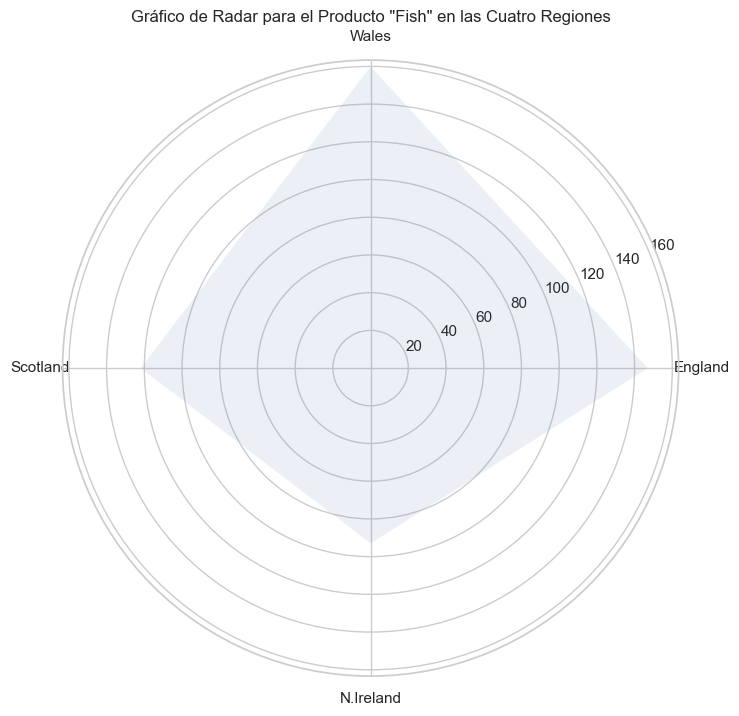

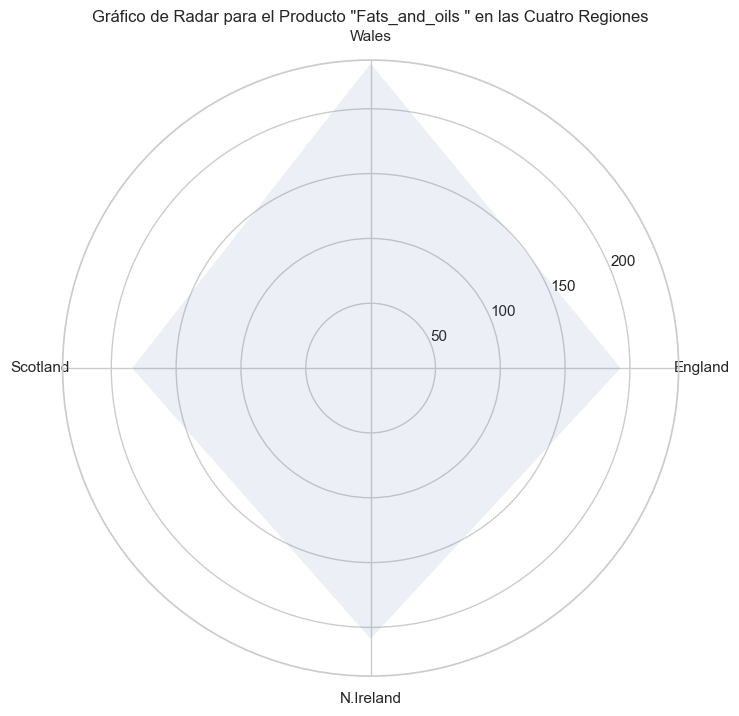

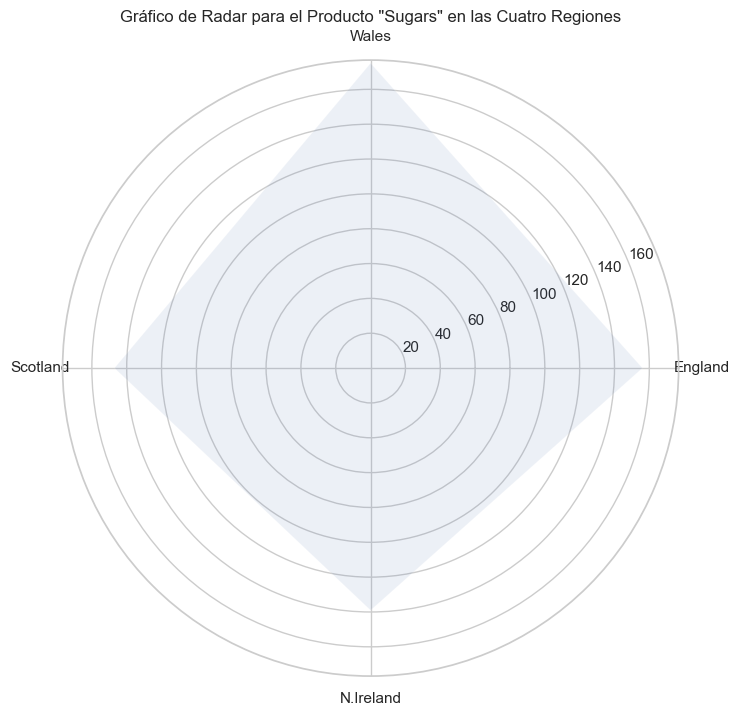

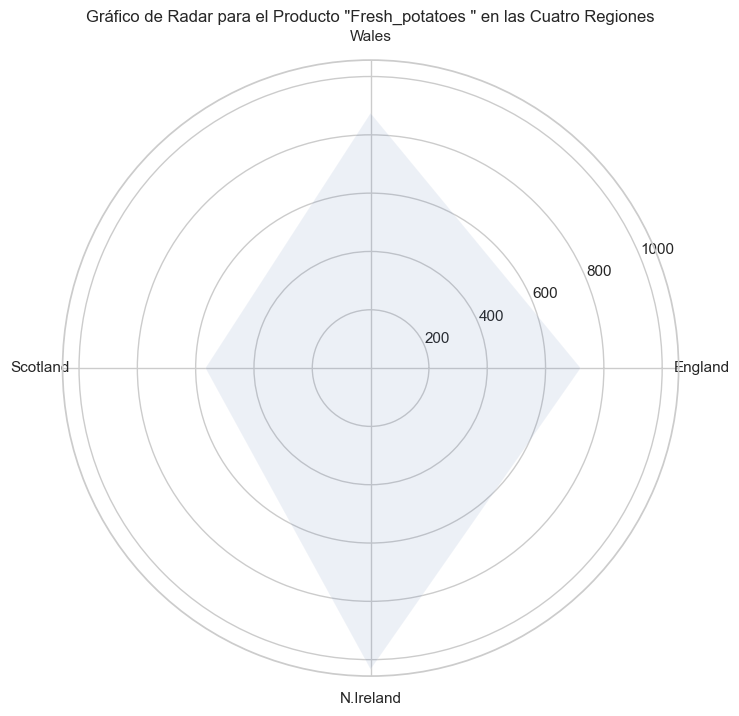

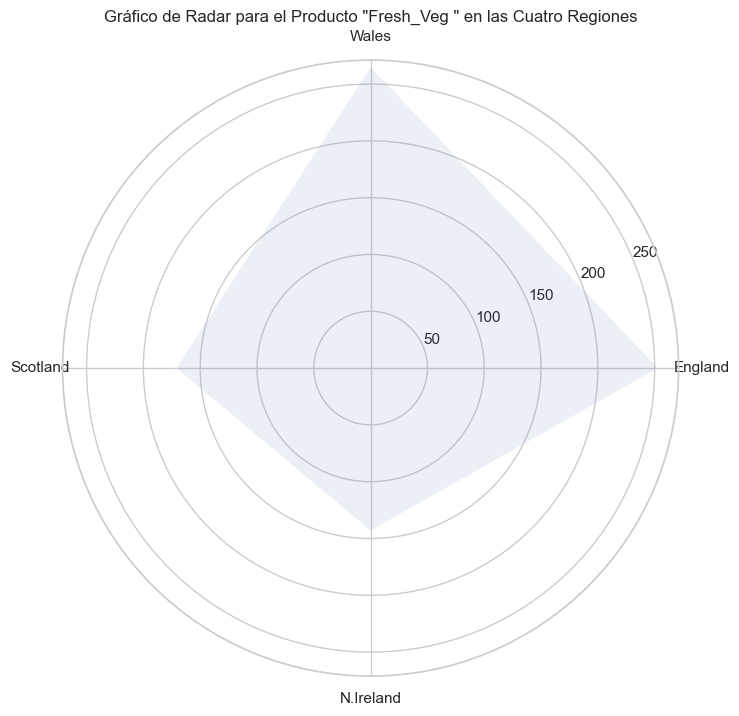

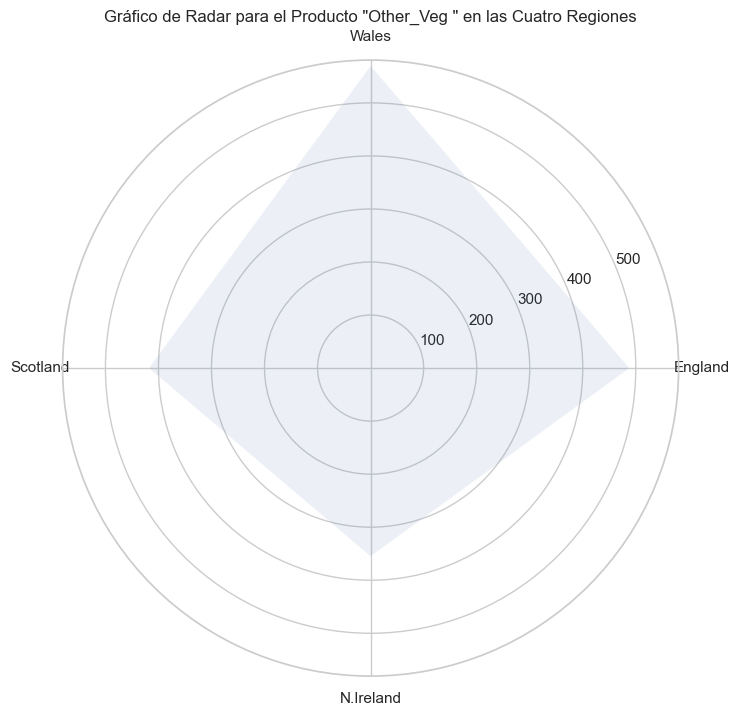

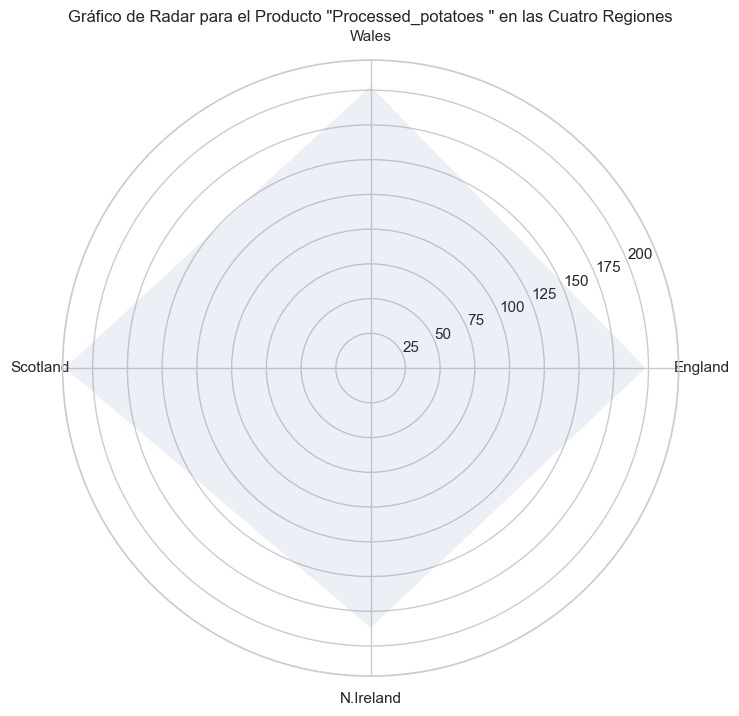

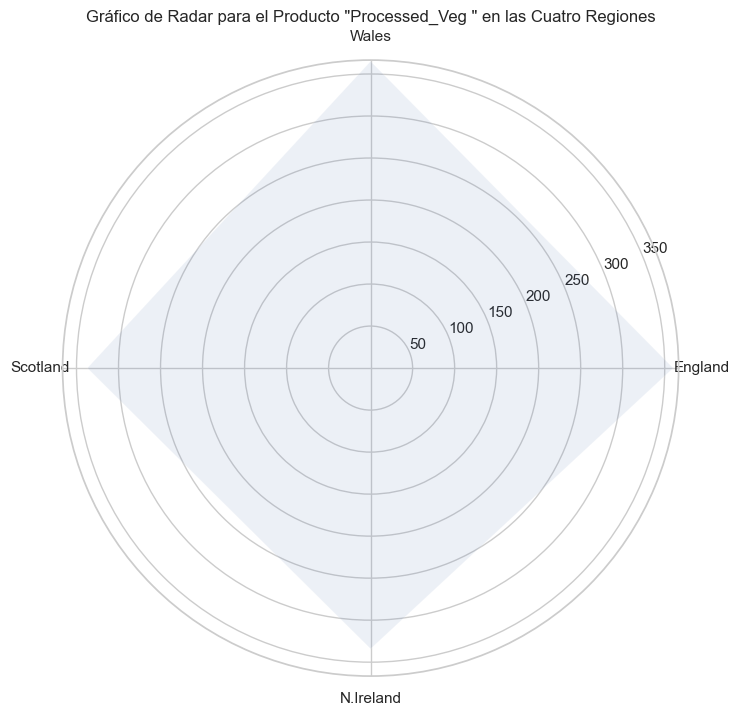

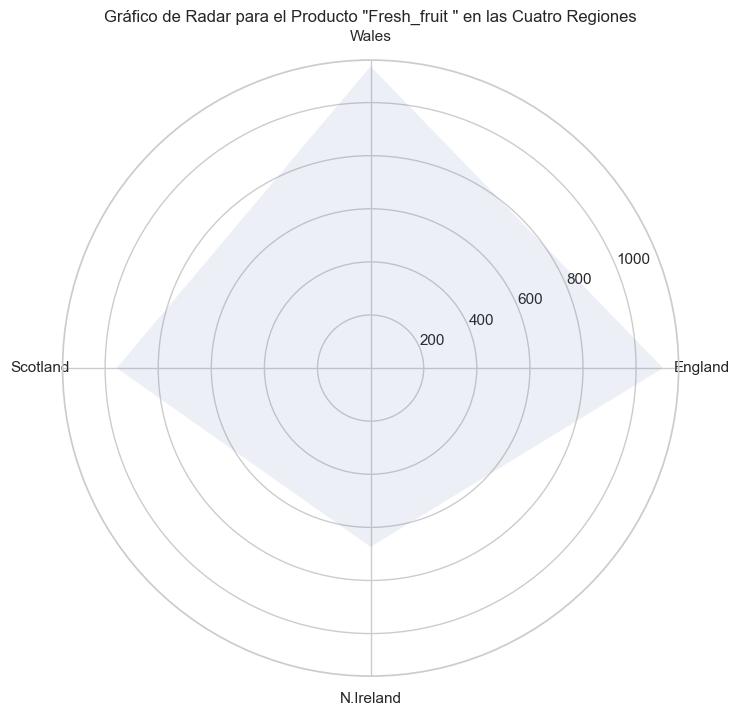

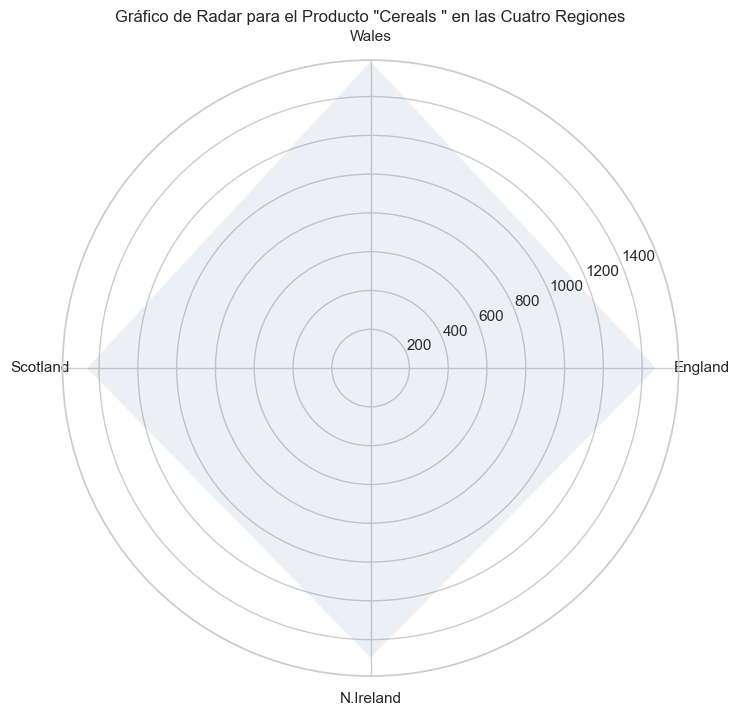

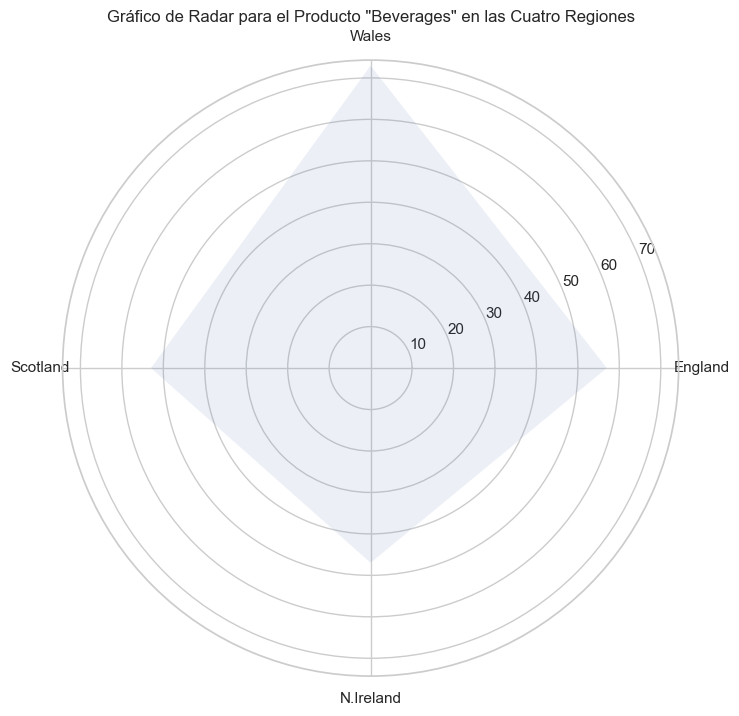

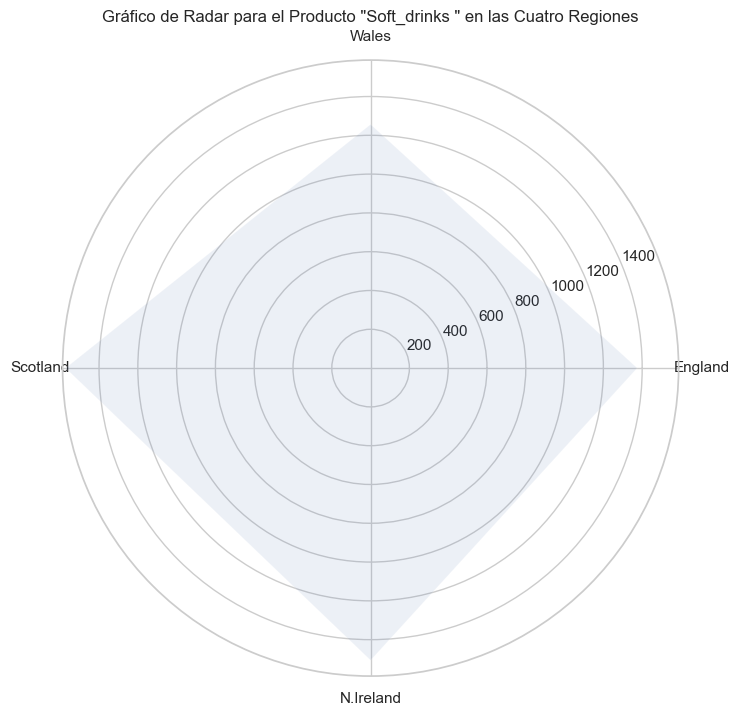

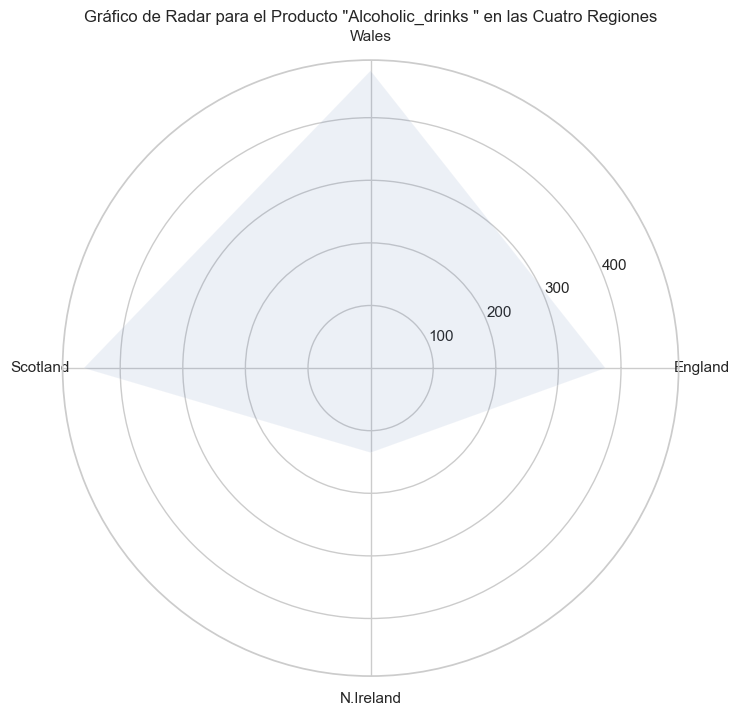

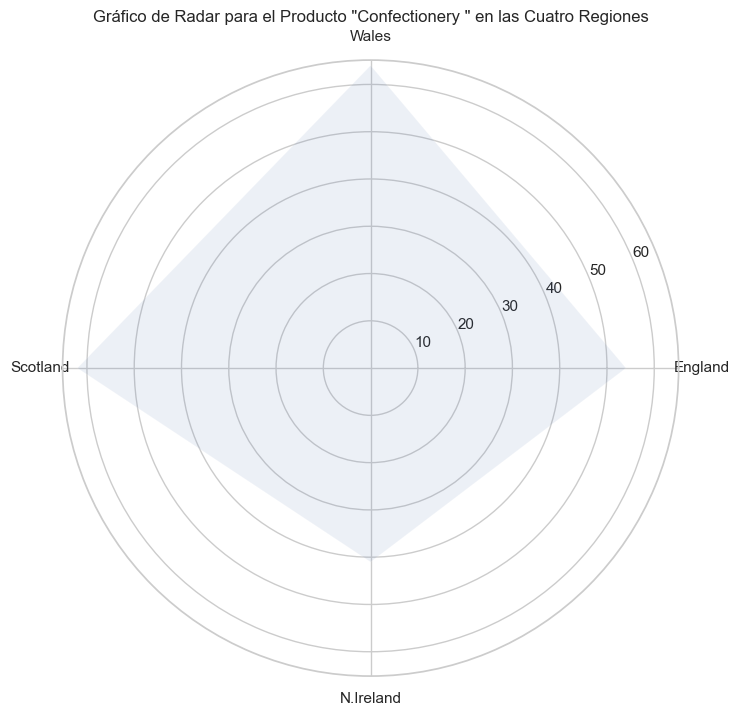

In [7]:
df = pd.DataFrame(data)

# Seleccionar las columnas numéricas para el gráfico de radar
columns = ["England", "Wales", "Scotland", "N.Ireland"]

# Iterar a través de cada producto y crear un gráfico de radar
for product in df["Product"]:
    # Crear un array de valores para cada región
    values = df.loc[df["Product"] == product, columns].values.flatten().tolist()

    # Crear un array de nombres de regiones
    regions = columns

    # Calcular el ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()

    # Agregar el primer valor al final para cerrar el gráfico
    values += values[:1]
    angles += angles[:1]

    # Crear la figura y el eje polar
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Dibujar el gráfico de radar
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(regions)

    # Mostrar el título del producto en el gráfico
    plt.title(f'Gráfico de Radar para el Producto "{product}" en las Cuatro Regiones')

    # Mostrar el gráfico de radar
    plt.show()

## Normalización de datos

In [8]:
# Transponer
data_transposed = data.iloc[:, 1:].T

# Normalización
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_transposed)

In [9]:
data

,Product,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


In [10]:
data_scaled

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

## Contrucción de Autocodificador

In [11]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(data_scaled.shape[1],)))
model.add(Dense(2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(data_scaled.shape[1], activation='sigmoid'))


In [12]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(data_scaled.shape[1],)))
model.add(Dense(2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(data_scaled.shape[1], activation='sigmoid'))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.1655
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1650
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1646
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1641
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1637
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1633
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1629
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1626
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1622
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1619
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1615
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1612
Epoch 13/100
1/1 [==============================] - 0s 9ms/

In [13]:
# Evaluar el rendimiento del modelo
loss = model.evaluate(data_scaled, data_scaled)
print('Pérdida de reconstrucción:', loss*100,"%")


1/1 [==============================] - 0s 440ms/step - loss: 0.1271
Pérdida de reconstrucción: 12.7102330327034 %


In [14]:
encoder = Model(inputs=model.input, outputs=model.layers[1].output)
data_2d = encoder.predict(data_scaled)


1/1 [==============================] - 0s 233ms/step


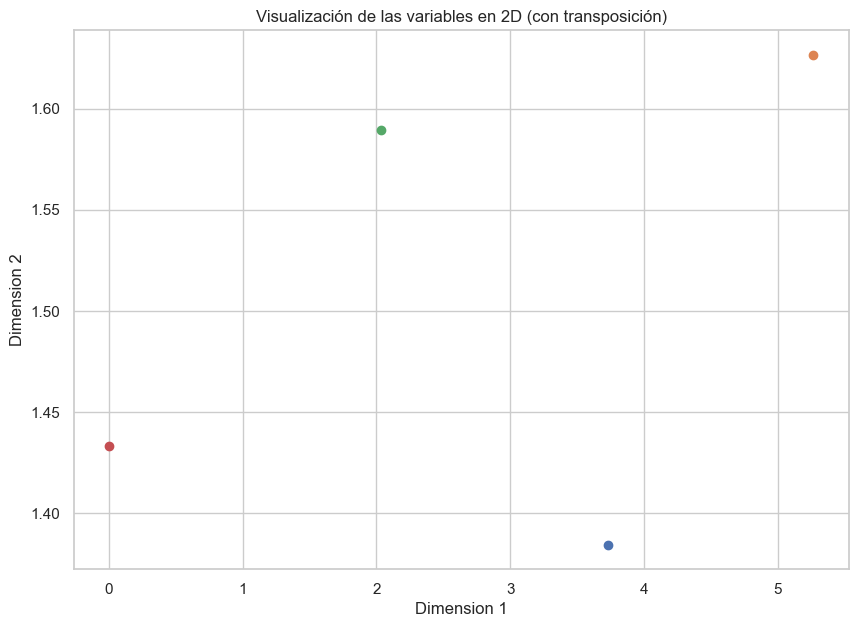

In [ ]:
plt.figure(figsize=(10, 7))

for i in range(len(data_2d)):
    plt.scatter(data_2d[i, 0], data_2d[i, 1])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualización de las variables en 2D (con transposición)')
plt.show()